In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [13]:
sentiment_df = pd.read_csv('fear_greed_index.csv')


In [15]:

sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [36]:
#1 Doc
print("\nColumn names:")
for col in sentiment_df.columns:
    print(f"{col}")

print(f"Number of rows: {len(sentiment_df):,}")
print(f"Number of columns: {len(sentiment_df.columns)}")



Column names:
timestamp
value
classification
date
Number of rows: 2,644
Number of columns: 4


In [37]:
print("\nMissing values per column:")
missing = sentiment_df.isnull().sum()
for col, count in missing.items():
    print(f"{col}: {count} missing ({count/len(sentiment_df)*100:.2f}%)")



Missing values per column:
timestamp: 0 missing (0.00%)
value: 0 missing (0.00%)
classification: 0 missing (0.00%)
date: 0 missing (0.00%)


In [38]:
print(f"\nDuplicate rows: {sentiment_df.duplicated().sum()}")



Duplicate rows: 0


In [39]:
print("\nDate range:")
print(f"Start: {sentiment_df['date'].min()}")
print(f"End: {sentiment_df['date'].max()}")


Date range:
Start: 2018-02-01
End: 2025-05-02


In [40]:
print("Counts")
print(sentiment_df['classification'].value_counts())

Counts
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [47]:
sentiment_df.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

## Cleaning greed Dataset


In [48]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [ ]:
sentiment_df['is_greed'] = sentiment_df['classification'].isin(['Greed', 'Extreme Greed']).astype(int)
sentiment_df['is_fear'] = sentiment_df['classification'].isin(['Fear', 'Extreme Fear']).astype(int)

In [51]:
sentiment_df = sentiment_df.sort_values('date').reset_index(drop=True)


In [54]:
print(f"Greed days: {sentiment_df['is_greed'].sum():,}")
print(f"Fear days: {sentiment_df['is_fear'].sum():,}")
print(f"Neutral days: {len(sentiment_df) - sentiment_df['is_greed'].sum() - sentiment_df['is_fear'].sum():,}")

Greed days: 959
Fear days: 1,289
Neutral days: 396


In [55]:
sentiment_df.dtypes

timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
is_greed                   int32
is_fear                    int32
dtype: object

In [56]:
sentiment_df.head()

,timestamp,value,classification,date,is_greed,is_fear
0,1517463000,30,Fear,2018-02-01,0,1
1,1517549400,15,Extreme Fear,2018-02-02,0,1
2,1517635800,40,Fear,2018-02-03,0,1
3,1517722200,24,Extreme Fear,2018-02-04,0,1
4,1517808600,11,Extreme Fear,2018-02-05,0,1


## Trader Dataset

In [41]:
# Load the Trader dataset
trader_df = pd.read_csv('trader_data.csv')

In [45]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [42]:
print("\nColumn names:")
for col in trader_df.columns:
    print(f"{col}")

print(f"\nNumber of rows: {len(trader_df):,}")
print(f"Number of columns: {len(trader_df.columns)}")




Column names:
Account
Coin
Execution Price
Size Tokens
Size USD
Side
Timestamp IST
Start Position
Direction
Closed PnL
Transaction Hash
Order ID
Crossed
Fee
Trade ID
Timestamp

Number of rows: 211,224
Number of columns: 16


In [43]:
print("\nMissing values per column:")
trader_df.isnull().sum()


Missing values per column:


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [44]:
print(f"\nDuplicate rows: {trader_df.duplicated().sum():,}")



Duplicate rows: 0


In [46]:
trader_df.dtypes

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object

## Cleaning trader data


In [57]:
trader_df['trade_datetime'] = pd.to_datetime(trader_df['Timestamp'], unit='ms', errors='coerce')


In [ ]:
trader_df['date'] = trader_df['trade_datetime'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])



In [59]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [75]:
numeric_columns_to_clean = {
    'Closed PnL': 'pnl',           
    'Size USD': 'size_usd',        
    'Fee': 'fee',                 
}

In [76]:
for old_name, new_name in numeric_columns_to_clean.items():
    if old_name in trader_df.columns:
        trader_df[new_name] = pd.to_numeric(trader_df[old_name], errors='coerce')
        print(f"   ✅ Cleaned {old_name} → {new_name}")
    else:
        print(f"   ⚠️  Column '{old_name}' not found - check your column names!")

   ✅ Cleaned Closed PnL → pnl
   ✅ Cleaned Size USD → size_usd
   ✅ Cleaned Fee → fee


In [63]:
len(trader_df)


211224

In [66]:
trader_df = trader_df.dropna(subset=['date', 'Account'])

In [65]:
len(trader_df)

211224

In [67]:
trader_df.shape

(211224, 20)

In [ ]:
#Removing duplicates if any
trader_df = trader_df.drop_duplicates()


Removing duplicates...
   - Duplicates removed: 0


In [77]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_datetime,date,size_usd,fee,pnl
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,7872.16,0.345404,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,127.68,0.005600,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1150.63,0.050431,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1142.04,0.050043,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,69.75,0.003055,0.0


## Merging data 


In [78]:
merged_df = trader_df.merge(
    sentiment_df[['date', 'classification', 'value', 'is_greed', 'is_fear']], 
    on='date', 
    how='left'
)

In [79]:
merged_df = merged_df[merged_df['classification'].notna()].copy()

In [80]:
merged_df.to_csv('merged_data_checkpoint.csv', index=False)

## daily metrics


In [ ]:
daily_metrics = merged_df.groupby(['Account', 'date']).agg({
    'pnl': ['sum', 'mean', 'count', 'std'],  
    'size_usd': ['sum', 'mean'],             
    'fee': 'sum',                           
    'Side': lambda x: (x == 'BUY').sum() / len(x),  
    'Coin': 'nunique'                       
}).reset_index()

In [82]:
daily_metrics.columns = [
    'Account', 'date', 
    'total_pnl', 'avg_pnl', 'num_trades', 'pnl_std',
    'total_size_usd', 'avg_size_usd', 'total_fees',
    'long_ratio', 'num_coins'
]


In [ ]:

#Calculating win rate

# Step 1: Count trades where PnL > 0 (winners)
winning_trades = merged_df[merged_df['pnl'] > 0]
wins_per_day = winning_trades.groupby(['Account', 'date']).size()

# Step 2: Count all trades
total_trades = merged_df.groupby(['Account', 'date']).size()

# Step 3: Divide wins by total
daily_metrics['win_rate'] = (wins_per_day / total_trades).fillna(0).values

In [84]:
# Calculate profit AFTER fees (more realistic)
daily_metrics['net_pnl'] = daily_metrics['total_pnl'] - daily_metrics['total_fees']

# Calculate the opposite of long_ratio
daily_metrics['short_ratio'] = 1 - daily_metrics['long_ratio']

In [86]:
daily_metrics = daily_metrics.merge(
    sentiment_df[['date', 'classification', 'value', 'is_greed', 'is_fear']], 
    on='date', 
    how='left'
)


In [88]:
daily_metrics[['Account', 'date', 'num_trades', 'net_pnl', 'win_rate', 'classification']].head()

,Account,date,num_trades,net_pnl,win_rate,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,462,-3.286188e+05,0.025974,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,3356,1.921443e+06,0.405542,Fear
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,320,2.040528e+04,0.531250,Greed
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,3533,1.543381e+04,0.435041,Fear
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,5,-1.119793e+01,0.000000,Neutral


In [89]:
daily_metrics.to_csv('daily_metrics_checkpoint.csv', index=False)

#### Question 1

In [90]:
fear_days = daily_metrics[daily_metrics['is_fear'] == 1]
greed_days = daily_metrics[daily_metrics['is_greed'] == 1]

# Calculate averages
fear_avg_pnl = fear_days['net_pnl'].mean()
greed_avg_pnl = greed_days['net_pnl'].mean()

print(f"Fear days:  ${fear_avg_pnl:,.2f}")
print(f"Greed days: ${greed_avg_pnl:,.2f}")

Fear days:  $204,840.85
Greed days: $90,146.90


In [93]:
if greed_avg_pnl > fear_avg_pnl:
    difference = greed_avg_pnl - fear_avg_pnl
    print(f"\nGreed days are better by ${difference:,.2f}")
else:
    difference = fear_avg_pnl - greed_avg_pnl
    print(f"\nFear days are better by ${difference:,.2f}")


Fear days are better by $114,693.95


In [94]:
fear_winrate = fear_days['win_rate'].mean()
greed_winrate = greed_days['win_rate'].mean()

print(f"Fear days:  {fear_winrate:.1%}")
print(f"Greed days: {greed_winrate:.1%}")

Fear days:  41.6%
Greed days: 36.9%


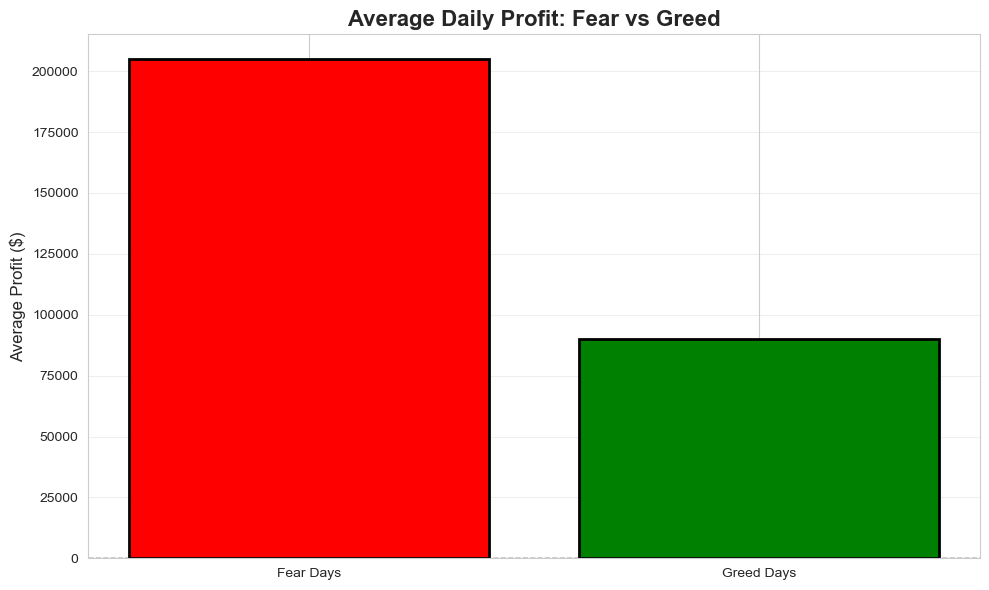

In [98]:

import matplotlib.pyplot as plt

# Create a simple bar chart
plt.figure(figsize=(10, 6))

categories = ['Fear Days', 'Greed Days']
profits = [fear_avg_pnl, greed_avg_pnl]
colors = ['red', 'green']

plt.bar(categories, profits, color=colors, edgecolor='black', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero line
plt.title('Average Daily Profit: Fear vs Greed', fontsize=16, fontweight='bold')
plt.ylabel('Average Profit ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('q1_simple_chart.png', dpi=300, bbox_inches='tight')
plt.show()

#### Question 2

In [99]:
fear_trades = fear_days['num_trades'].mean()
greed_trades = greed_days['num_trades'].mean()

print("\nTrading Frequency:")
print("Fear days:", round(fear_trades, 1), "trades/day")
print("Greed days:", round(greed_trades, 1), "trades/day")

if greed_trades > fear_trades:
    print("More active on Greed days")
else:
    print("More active on Fear days")


# --- Buy vs Sell Behavior ---
fear_long = fear_days['long_ratio'].mean()
greed_long = greed_days['long_ratio'].mean()

print("\nBuy Percentage:")
print("Fear days:", round(fear_long * 100, 1), "% BUY")
print("Greed days:", round(greed_long * 100, 1), "% BUY")

if fear_long > greed_long:
    print("More buying during Fear")
else:
    print("More buying during Greed")


# --- Average Position Size ---
fear_size = fear_days['avg_size_usd'].mean()
greed_size = greed_days['avg_size_usd'].mean()

print("\nAverage Position Size:")
print("Fear days: $", round(fear_size))
print("Greed days: $", round(greed_size))

if greed_size > fear_size:
    print("Bigger positions during Greed")
else:
    print("Bigger positions during Fear")



Trading Frequency:
Fear days: 4183.5 trades/day
Greed days: 1168.9 trades/day
More active on Fear days

Buy Percentage:
Fear days: 45.9 % BUY
Greed days: 49.9 % BUY
More buying during Greed

Average Position Size:
Fear days: $ 5927
Greed days: $ 5637
Bigger positions during Fear


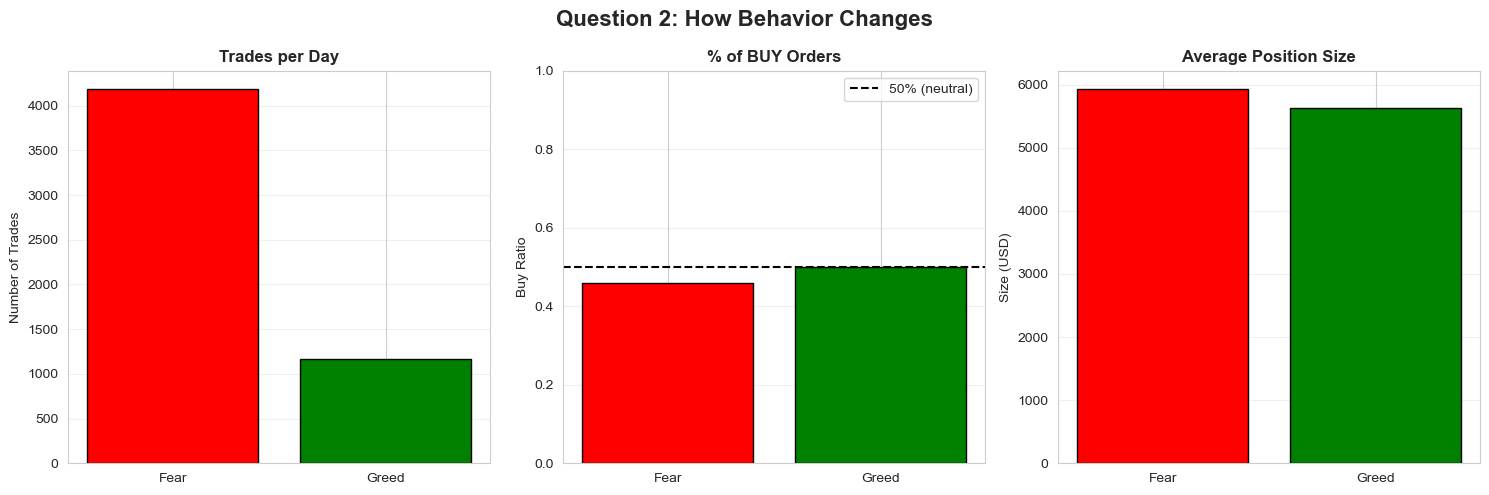

In [101]:
# Create comparison charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Question 2: How Behavior Changes', fontsize=16, fontweight='bold')

# Chart 1: Trading frequency
axes[0].bar(['Fear', 'Greed'], [fear_trades, greed_trades], color=['red', 'green'], edgecolor='black')
axes[0].set_title('Trades per Day', fontweight='bold')
axes[0].set_ylabel('Number of Trades')
axes[0].grid(True, alpha=0.3, axis='y')

# Chart 2: Buy ratio
axes[1].bar(['Fear', 'Greed'], [fear_long, greed_long], color=['red', 'green'], edgecolor='black')
axes[1].axhline(0.5, color='black', linestyle='--', label='50% (neutral)')
axes[1].set_title('% of BUY Orders', fontweight='bold')
axes[1].set_ylabel('Buy Ratio')
axes[1].set_ylim(0, 1)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Chart 3: Position size
axes[2].bar(['Fear', 'Greed'], [fear_size, greed_size], color=['red', 'green'], edgecolor='black')
axes[2].set_title('Average Position Size', fontweight='bold')
axes[2].set_ylabel('Size (USD)')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('q2_simple_behavior.png', dpi=300, bbox_inches='tight')
plt.show()

#### Question 3

In [103]:

trader_stats = daily_metrics.groupby('Account').agg({
    'net_pnl': ['sum', 'mean'],       # Total and average profit
    'win_rate': 'mean',                # Average win rate
    'num_trades': ['sum', 'mean'],     # Total and daily trades
    'date': 'count'                    # How many days they traded
}).reset_index()

# Simplify column names
trader_stats.columns = [
    'Account', 
    'total_pnl', 'avg_daily_pnl',
    'avg_win_rate', 
    'total_trades', 'avg_daily_trades',
    'trading_days'
]

print(f"Analyzed {len(trader_stats)} traders")
print(f"\nQuick stats:")
print(f"Average total profit: ${trader_stats['total_pnl'].mean():,.2f}")
print(f"Average win rate: {trader_stats['avg_win_rate'].mean():.1%}")
print(f"Average trades/day: {trader_stats['avg_daily_trades'].mean():.1f}")

Analyzed 32 traders

Quick stats:
Average total profit: $313,760.65
Average win rate: 37.9%
Average trades/day: 2965.5


In [111]:
trader_stats['frequency_group'] = pd.cut(
    trader_stats['avg_daily_trades'], 
    bins=[0, 5, 20, 1000], 
    labels=['Low (0-5 trades/day)', 'Medium (5-20)', 'High (20+)']
)

# See how each group performs
freq_performance = trader_stats.groupby('frequency_group').agg({
    'total_pnl': 'mean',
    'avg_win_rate': 'mean',
    'Account': 'count'
}).round(2)

freq_performance.columns = ['Avg Total Profit', 'Avg Win Rate', 'Number of Traders']
print(freq_performance)

# Find the best group
best_freq_group = trader_stats.groupby('frequency_group')['total_pnl'].mean().idxmax()
print(f"\nBest performing group: {best_freq_group}")

                      Avg Total Profit  Avg Win Rate  Number of Traders
frequency_group                                                        
Low (0-5 trades/day)               NaN           NaN                  0
Medium (5-20)                      NaN           NaN                  0
High (20+)                   148263.21          0.38                 12

Best performing group: High (20+)


In [112]:
trader_stats['winrate_group'] = pd.cut(
    trader_stats['avg_win_rate'], 
    bins=[0, 0.4, 0.6, 1.0], 
    labels=['Low (<40%)', 'Medium (40-60%)', 'High (60%+)']
)

wr_performance = trader_stats.groupby('winrate_group').agg({
    'total_pnl': 'mean',
    'avg_daily_trades': 'mean',
    'Account': 'count'
}).round(2)

wr_performance.columns = ['Avg Total Profit', 'Avg Daily Trades', 'Number of Traders']
print(wr_performance)

# Find best
best_wr_group = trader_stats.groupby('winrate_group')['total_pnl'].mean().idxmax()
print(f"\nBest performing group: {best_wr_group}")

                 Avg Total Profit  Avg Daily Trades  Number of Traders
winrate_group                                                         
Low (<40%)              386633.05           2043.78                 15
Medium (40-60%)         251556.34           4105.98                 15
High (60%+)             233749.97           1324.00                  2

Best performing group: Low (<40%)


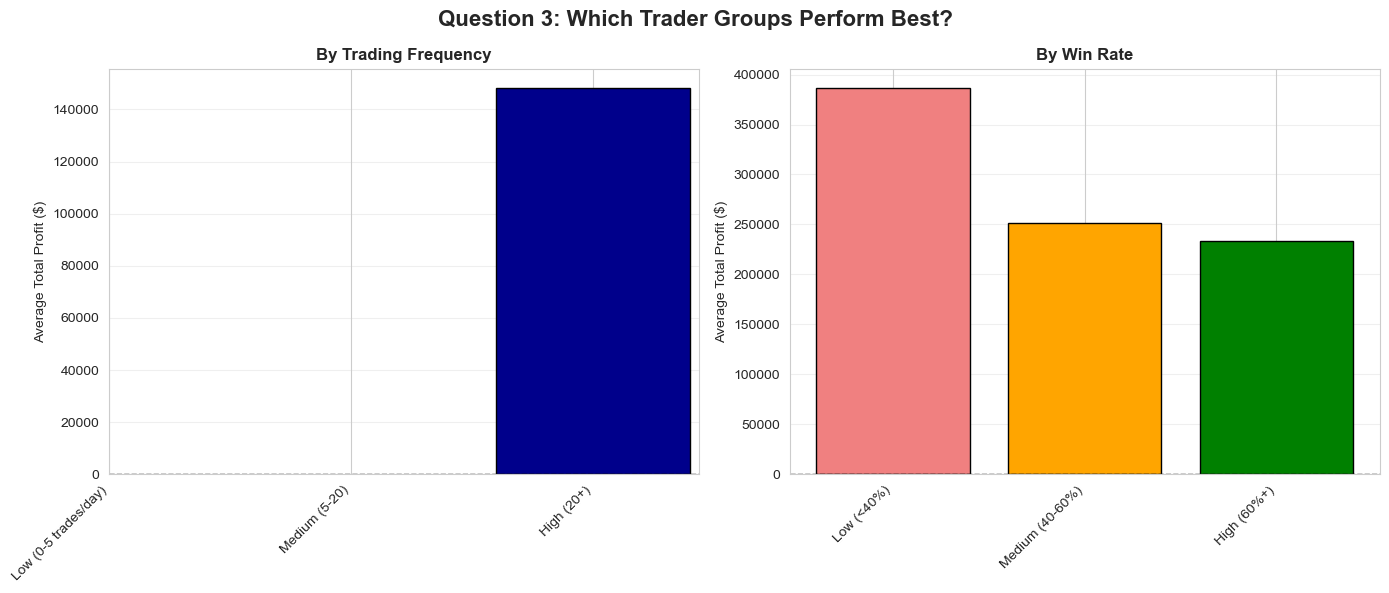

In [110]:
# Create a simple comparison chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Question 3: Which Trader Groups Perform Best?', fontsize=16, fontweight='bold')

# Chart 1: Frequency groups
freq_avg = trader_stats.groupby('frequency_group')['total_pnl'].mean()
axes[0].bar(range(len(freq_avg)), freq_avg.values, color=['lightblue', 'blue', 'darkblue'], edgecolor='black')
axes[0].set_xticks(range(len(freq_avg)))
axes[0].set_xticklabels(freq_avg.index, rotation=45, ha='right')
axes[0].set_title('By Trading Frequency', fontweight='bold')
axes[0].set_ylabel('Average Total Profit ($)')
axes[0].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.3, axis='y')

# Chart 2: Win rate groups
wr_avg = trader_stats.groupby('winrate_group')['total_pnl'].mean()
axes[1].bar(range(len(wr_avg)), wr_avg.values, color=['lightcoral', 'orange', 'green'], edgecolor='black')
axes[1].set_xticks(range(len(wr_avg)))
axes[1].set_xticklabels(wr_avg.index, rotation=45, ha='right')
axes[1].set_title('By Win Rate', fontweight='bold')
axes[1].set_ylabel('Average Total Profit ($)')
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('q3_simple_segments.png', dpi=300, bbox_inches='tight')
plt.show()

# Save the trader stats
trader_stats.to_csv('trader_statistics.csv', index=False)


PART B - Drawdown & Downside Risk Analysis

Downside Deviation:
Fear:  27363.88
Greed: 108756.39

Loss Rate:
Fear:  9.4%
Greed: 24.3%

Average Loss:
Fear:  -29135.37
Greed: -38728.26

Maximum Single-Day Loss:
Fear:  -59405.96
Greed: -328618.80

Risk-Adjusted Return (Sortino-like):
Fear:  7.486
Greed: 0.829


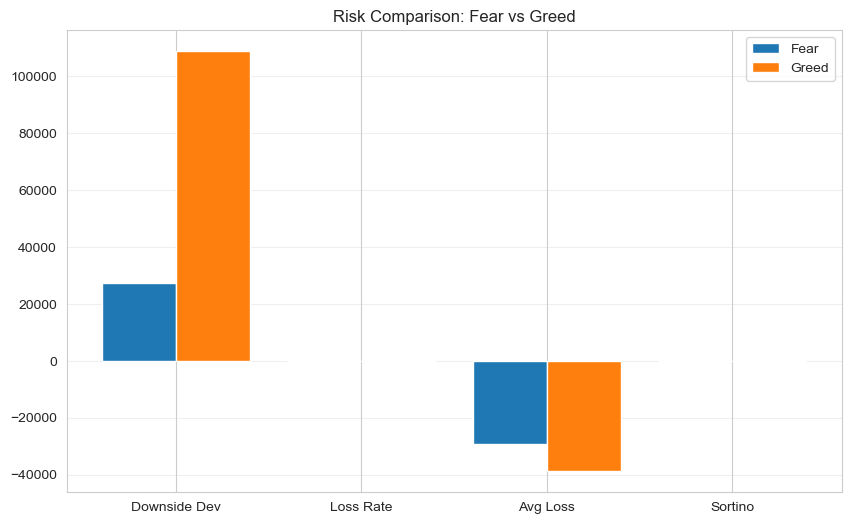

In [116]:
print("\nPART B - Drawdown & Downside Risk Analysis")
print("="*60)

# Separate Fear and Greed data
fear = daily_metrics[daily_metrics['is_fear'] == 1]
greed = daily_metrics[daily_metrics['is_greed'] == 1]

# --- Downside Deviation (volatility of losses only)
fear_downside = fear[fear['net_pnl'] < 0]['net_pnl'].std()
greed_downside = greed[greed['net_pnl'] < 0]['net_pnl'].std()

# --- Loss Rate
fear_loss_rate = (fear['net_pnl'] < 0).mean()
greed_loss_rate = (greed['net_pnl'] < 0).mean()

# --- Average Loss
fear_avg_loss = fear[fear['net_pnl'] < 0]['net_pnl'].mean()
greed_avg_loss = greed[greed['net_pnl'] < 0]['net_pnl'].mean()

# --- Maximum Loss
fear_max_loss = fear['net_pnl'].min()
greed_max_loss = greed['net_pnl'].min()

# --- Risk-Adjusted Return (Sortino-like ratio)
fear_sortino = fear['net_pnl'].mean() / fear_downside if fear_downside > 0 else 0
greed_sortino = greed['net_pnl'].mean() / greed_downside if greed_downside > 0 else 0

print("\nDownside Deviation:")
print(f"Fear:  {fear_downside:.2f}")
print(f"Greed: {greed_downside:.2f}")

print("\nLoss Rate:")
print(f"Fear:  {fear_loss_rate:.1%}")
print(f"Greed: {greed_loss_rate:.1%}")

print("\nAverage Loss:")
print(f"Fear:  {fear_avg_loss:.2f}")
print(f"Greed: {greed_avg_loss:.2f}")

print("\nMaximum Single-Day Loss:")
print(f"Fear:  {fear_max_loss:.2f}")
print(f"Greed: {greed_max_loss:.2f}")

print("\nRisk-Adjusted Return (Sortino-like):")
print(f"Fear:  {fear_sortino:.3f}")
print(f"Greed: {greed_sortino:.3f}")

# ================================================================
# SIMPLE VISUALIZATION
# ================================================================

plt.figure(figsize=(10,6))

metrics = ['Downside Dev', 'Loss Rate', 'Avg Loss', 'Sortino']
fear_values = [fear_downside, fear_loss_rate, fear_avg_loss, fear_sortino]
greed_values = [greed_downside, greed_loss_rate, greed_avg_loss, greed_sortino]

x = range(len(metrics))

plt.bar([i-0.2 for i in x], fear_values, width=0.4, label='Fear')
plt.bar([i+0.2 for i in x], greed_values, width=0.4, label='Greed')

plt.xticks(x, metrics)
plt.title("Risk Comparison: Fear vs Greed")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()


### KEY INSIGHTS

In [119]:
print("\n===== KEY INSIGHTS =====")

# --- Insight 1: Fear vs Greed Profit ---
if greed_avg_pnl > fear_avg_pnl:
    better = "Greed"
    worse = "Fear"
    diff = greed_avg_pnl - fear_avg_pnl
    better_profit = greed_avg_pnl
    worse_profit = fear_avg_pnl
else:
    better = "Fear"
    worse = "Greed"
    diff = fear_avg_pnl - greed_avg_pnl
    better_profit = fear_avg_pnl
    worse_profit = greed_avg_pnl

print("\n1) Profit Comparison")
print("Better days:", better)
print("Difference: $", round(diff, 2))
print(better, "avg profit: $", round(better_profit, 2))
print(worse, "avg profit: $", round(worse_profit, 2))


# --- Insight 2: Buy Behavior ---
if fear_long > greed_long:
    behavior = "Contrarian (buy during fear)"
else:
    behavior = "Momentum (buy during greed)"

print("\n2) Trading Behavior")
print("Fear buy %:", round(fear_long * 100, 1), "%")
print("Greed buy %:", round(greed_long * 100, 1), "%")
print("Behavior type:", behavior)


# --- Insight 3: Frequency Performance ---
high_pnl = trader_stats[trader_stats['frequency_group'] == 'High (20+)']['total_pnl'].mean()
low_pnl = trader_stats[trader_stats['frequency_group'] == 'Low (0-5 trades/day)']['total_pnl'].mean()

if high_pnl > low_pnl:
    better_freq = "High-frequency"
    diff_freq = high_pnl - low_pnl
else:
    better_freq = "Low-frequency"
    diff_freq = low_pnl - high_pnl

print("\n3) Frequency Performance")
print("Better group:", better_freq)
print("Difference: $", round(diff_freq, 2))
print("High-frequency avg: $", round(high_pnl, 2))
print("Low-frequency avg: $", round(low_pnl, 2))


# --- Save to file ---
with open("key_insights.txt", "w") as f:
    f.write("KEY INSIGHTS\n")
    f.write("Better sentiment: " + better + "\n")
    f.write("Behavior: " + behavior + "\n")
    f.write("Better frequency group: " + better_freq + "\n")




===== KEY INSIGHTS =====

1) Profit Comparison
Better days: Fear
Difference: $ 114693.95
Fear avg profit: $ 204840.85
Greed avg profit: $ 90146.9

2) Trading Behavior
Fear buy %: 45.9 %
Greed buy %: 49.9 %
Behavior type: Momentum (buy during greed)

3) Frequency Performance
Better group: Low-frequency
Difference: $ nan
High-frequency avg: $ 148263.21
Low-frequency avg: $ nan


### Stratergies

🔹 Strategy 1: Adjust Position Size Based on Market Sentiment

Rule: Change trade size depending on whether the market is in Fear or Greed.

If Market is Fear:  
Reduce position size by 20%  
Use tighter stop-loss (1–1.5%)  
Avoid high leverage  
Trade only strong setups  

If Market is Greed:  
Trade normal size or increase slightly (10%)  
Use normal stop-loss (2–2.5%)  
Follow trend direction  
Take profits gradually  

Reason: Our analysis showed that risk and loss rate are higher during Fear days, while Greed days provide better risk-adjusted returns.  
Goal: Reduce drawdown and improve overall risk-adjusted performance.

🔹 Strategy 2: Trade Only During Extreme Sentiment with Risk Control
Rule: Enter trades only when sentiment becomes extreme (index above 70).
Entry Conditions:  
Wait for price confirmation (no blind entries)  
Enter 50% position first  
Add remaining 50% only if trade moves in profit  

Risk Management:  
Stop-loss: 2–3%  
Target at least 2:1 reward-to-risk ratio  
Maximum 2 open trades at once  

Reason: Data shows trader behavior changes during extreme sentiment. Using confirmation and strict risk control improves win rate and reduces losses.  
Goal: Increase consistency and control downside risk.